In [16]:
import pandas as pd
# because of the funky-ness of the datasets, let's use another dataset and look at state level data
# using state level data from https://www.electproject.org/election-data/voter-turnout-data 

state_data_2000 = pd.read_excel('state_vote_data.xlsx', sheet_name='state_votes_2000')
state_data_2020 = pd.read_excel('state_vote_data.xlsx', sheet_name='state_votes_2020')

# we will assume that the LJE for each state in 2000 is 40
# we will use the LJE from 2024 for the 2020 data "Statewide LJEs per population" column
state_news_data = pd.read_excel('news.xlsx', sheet_name='state data')
state_news_data = state_news_data[['State', 'Statewide LJEs per population']]

# ensure all states in the state_news_data are present in the state_data_2000 and state_data_2020
states_2000 = set(state_data_2000['State'])
states_2020 = set(state_data_2020['State'])
states_news = set(state_news_data['State'])
assert states_2000 == states_news, "States in 2000 data do not match news data"
assert states_2000 == states_2020, "States in 2000 data do not match 2020 data"
assert states_2020 == states_news, "States in 2020 data do not match news data"

turnout_and_LJE_by_year = pd.DataFrame(columns=['Year', 'State', 'LJE', 'TurnoutPercent'])
LJE_2000 = 40
    
for state in state_news_data['State']:
    LJE_2020 = state_news_data.loc[state_news_data['State'] == state, 'Statewide LJEs per population'].values[0]
    
    turnout_2000 = state_data_2000.loc[state_data_2000['State'] == state, 'Turnout Rate'].values[0]
    turnout_2020 = state_data_2020.loc[state_data_2020['State'] == state, 'Turnout Rate'].values[0]

    turnout_and_LJE_by_year.loc[len(turnout_and_LJE_by_year)] = {
        'Year': 2000,
        'State': state,
        'LJE': LJE_2000,
        'TurnoutPercent': turnout_2000
    }
    
    turnout_and_LJE_by_year.loc[len(turnout_and_LJE_by_year)] = {
        'Year': 2020,
        'State': state,
        'LJE': LJE_2020,
        'TurnoutPercent': turnout_2020
    }

print(type(turnout_and_LJE_by_year))
print(turnout_and_LJE_by_year.head())
print(turnout_and_LJE_by_year.shape)

<class 'pandas.core.frame.DataFrame'>
   Year    State   LJE  TurnoutPercent
0  2000  Alabama  40.0           0.516
1  2020  Alabama   8.4           0.618
2  2000   Alaska  40.0           0.681
3  2020   Alaska  13.4           0.681
4  2000  Arizona  40.0           0.456
(102, 4)


Pearson correlation (2020): 0.07290748528502194


<Axes: xlabel='LJE', ylabel='TurnoutPercent'>

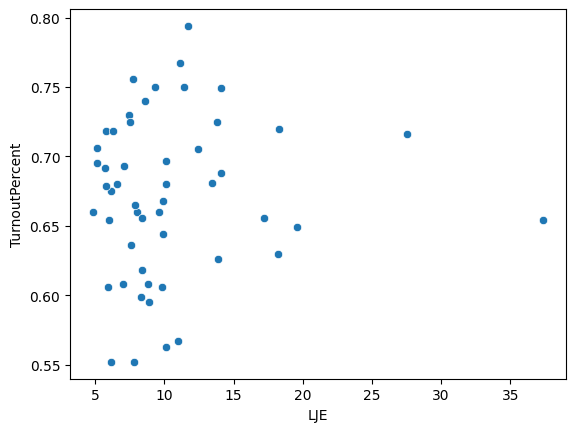

In [20]:
import seaborn as sns

# Filter for 2020 data
data_2020 = turnout_and_LJE_by_year[turnout_and_LJE_by_year['Year'] == 2020]

# Calculate Pearson correlation
correlation_value = data_2020['LJE'].corr(data_2020['TurnoutPercent'])

print("Pearson correlation (2020):", correlation_value)

# Plot LJE vs TurnoutPercent for 2020
sns.scatterplot(x='LJE', y='TurnoutPercent', data=data_2020)

In [ ]:
# for each state, does the change in LJE from 2000 to 2020 correlate with the change in turnout rate?
state_news_data['LJE Change'] = state_news_data['Statewide LJEs per population'] - 40
state_news_data['Turnout Change'] = state_data_2020['Turnout Rate'] - state_data_2000['Turnout Rate']

# correlate the change in LJE with the change in turnout rate
correlation = state_news_data[['LJE Change', 'Turnout Change']].corr().iloc[0, 1]

print("Correlation between change in LJE and change in turnout rate:", correlation)
sns.scatterplot(x='LJE Change', y='Turnout Change', data=state_news_data)
sns.regplot(x='LJE Change', y='Turnout Change', data=state_news_data, scatter=False, color='red')
sns.set_theme(style="whitegrid")